In [1]:
"""
Start file for hw1pr2 of Big Data Summer 2017

Before attemping the problem, please familiarize with pandas and numpy
libraries. Tutorials can be found online:
http://pandas.pydata.org/pandas-docs/stable/tutorials.html
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

This file only has one part: the main driver.

First, fill in the solution you obtained from part (a) in part (c) of the
main driver to generate plot for part (c).

Please COMMENT OUT part(d) in main driver before you finish that step.
Otherwise, you won't be able to run the program because of errors.

Note:
1. You must finish the first two parts (math part) of this problem before
   attempting the coding part.

2. Please read the instructions and hints carefully, and use the name of the
variables we provided, otherwise, the function may not work.

3. Placeholder values are given for the variables needed, they need to be
   replaced with your own code

3. Remember to comment out the TODO comment after you finish each part.
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

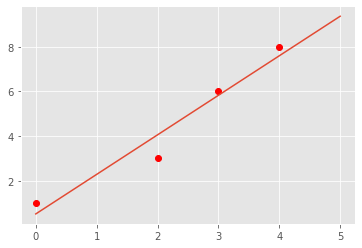

In [2]:
# =============part c: Plot data and the optimal linear fit=================
# NOTE: to finish this part, you need to finish the part(a) of this part first

# load the four data points of tihs problem
X = np.array([0, 2, 3, 4])
y = np.array([1, 3, 6, 8])

# plot four data points on the plot
plt.style.use('ggplot')
plt.plot(X, y, 'ro')

"*** YOUR CODE HERE ***"
m_opt = 62 / 35
b_opt = 18 / 35
"*** END YOUR CODE HERE ***"

X_space = []
y_space = []
"*** YOUR CODE HERE ***"
X_space = np.linspace(0, 5, num=100).reshape(-1, 1)
y_space = (m_opt * X_space + b_opt).reshape(-1, 1)

"*** END YOUR CODE HERE ***"

# plot the optimal learn fit you obtained and save it to your current
# folder
plt.plot(X_space, y_space)
#plt.savefig('hw1pr2c.png', format='png')
plt.show()

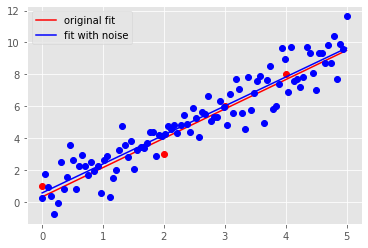

In [5]:
# =============part d: Optimal linear fit with random data points=================

# variables to start with
mu, sigma, sampleSize = 0, 1, 100

noise = []
"*** YOUR CODE HERE ***"
noise = np.random.normal(mu, sigma, sampleSize).reshape(-1, 1)
"*** END YOUR CODE HERE ***"

y_space_rand = np.zeros(len(X_space))
"*** YOUR CODE HERE ***"
y_space_rand = m_opt * X_space + b_opt + noise
"*** END YOUR CODE HERE ***"

X_space_stacked = X_space	# need to be replaced following hint 1 and 2
W_opt = None
"*** YOUR CODE HERE ***"
X_space_stacked = np.hstack((np.ones_like(y_space), X_space))
W_opt = np.linalg.solve(X_space_stacked.T @ X_space_stacked, X_space_stacked.T @ y_space_rand)
"*** END YOUR CODE HERE ***"

# get the new m, and new b from W_opt obtained above
b_rand_opt, m_rand_opt = W_opt.item(0), W_opt.item(1)

y_pred_rand = []
"*** YOUR CODE HERE ***"
y_pred_rand = (m_rand_opt * X_space + b_rand_opt).reshape(-1, 1)
"*** END YOUR CODE HERE ***"

# generate plot
# plot original data points and line
plt.plot(X, y, 'ro')
orig_plot, = plt.plot(X_space, y_space, 'r')

# plot the generated 100 points with white gaussian noise and the new line
plt.plot(X_space, y_space_rand, 'bo')
rand_plot, = plt.plot(X_space, y_pred_rand, 'b')

# set up legend and save the plot to the current folder
plt.legend((orig_plot, rand_plot), \
    ('original fit', 'fit with noise'), loc = 'best')
plt.show()